In [1]:
import scanpy as sc
import convex_gating as cg
from convex_gating import tools as ct
from convex_gating import helper as ch
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cells_per_level = {}
cells_per_level['2'] = ['cluster_T cell','cluster_NK cell']
cells_per_level['3'] = ['cluster_CD4+ T cell','cluster_CD8+ T cell','cluster_Double negative T cell','cluster_Double positive T cell',
 'cluster_NK cell']
cells_per_level['4']= ['cluster_CCR7- CD4+ T cell',
 'cluster_CCR7+ CD4+ T cell',
 'cluster_CCR7- CD8+ T cell',
 'cluster_CCR7+ CD8+ T cell',
'cluster_Double negative T cell',
'cluster_Double positive T cell',
'cluster_NK cell']

cells_per_level['5'] = ['cluster_CD4+ CM T cell',
'cluster_CD4+ TEMRA',
'cluster_CD8+ CM T cell',
'cluster_CD8+ TE T cell',
'cluster_Double negative T cell',
'cluster_Naive CD4+ T cell',
'cluster_NK cell',
'cluster_CD4+ EM T cell',
'cluster_CD4+ TRM T cell',
'cluster_CD8+ EM T cell',
'cluster_CD8+ TRM T cell',
'cluster_Double positive T cell',
'cluster_Naive CD8+ T cell']

In [4]:
levels = ['2','3','4','5']
#file_idents = ['A','B','C','H','J','O','T','U','all'] 
file_idents = ['A','B','C','H','J','O','T','U'] 

In [5]:
overview = pd.DataFrame(columns = ['ID','level','cell_type','f1'])
for patient in file_idents:
    for level in levels:
        for cluster in cells_per_level[level]:
            file_loc = patient +'/level_' + level + '/'+ cluster + '/performance.csv'
            f1 = np.max(pd.read_csv(file_loc).loc[0][1:])
            overview = overview.append(pd.DataFrame([[patient,level,cluster,f1]],columns=['ID','level','cell_type','f1']))
cell_type_new = []
for name in overview['cell_type']:
    cell_type_new.append(name[8:])
overview['cell_type'] = cell_type_new.copy()

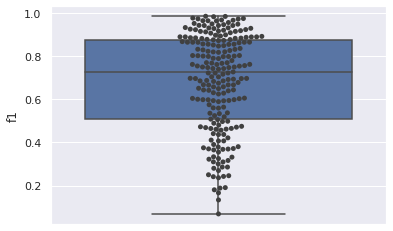

In [105]:
sns.set_style("darkgrid")
fig = plt.figure()
ax = sns.boxplot(y = overview['f1'])
ax = sns.swarmplot(y = overview['f1'],color=".25")
fig.savefig('figures/boxplot_all.pdf')

In [6]:
overview_A = overview[overview['ID'] == 'A']
overview_B = overview[overview['ID'] == 'B']
overview_C = overview[overview['ID'] == 'C']
overview_H = overview[overview['ID'] == 'H']
overview_J = overview[overview['ID'] == 'J']
overview_O = overview[overview['ID'] == 'O']
overview_T = overview[overview['ID'] == 'T']
overview_U = overview[overview['ID'] == 'U']
overview_level_2 = overview[overview['level'] == '2']
overview_level_3 = overview[overview['level'] == '3']
overview_level_4 = overview[overview['level'] == '4']
overview_level_5 = overview[overview['level'] == '5']

In [30]:
print(np.round(np.mean(overview_level_2['f1']),4))
print(np.round(np.mean(overview_level_3['f1']),4))
print(np.round(np.mean(overview_level_4['f1']),4))
print(np.round(np.mean(overview_level_5['f1']),4))

0.8736
0.74
0.689
0.6201


In [14]:
print(np.round(np.mean(overview_level_2[overview_level_2['cell_type'] == 'T cell']['f1']),4))
print(np.round(np.mean(overview_level_2[overview_level_2['cell_type'] == 'NK cell']['f1']),4))


0.9166
0.8306


In [ ]:
'''
'cluster_CD4+ T cell',
 'cluster_CD8+ T cell',
 'cluster_Double negative T cell',
 'cluster_Double positive T cell',
 'cluster_NK cell'
'''

In [15]:
print(np.round(np.mean(overview_level_3[overview_level_3['cell_type'] == 'CD4+ T cell']['f1']),4))
print(np.round(np.mean(overview_level_3[overview_level_3['cell_type'] == 'CD8+ T cell']['f1']),4))
print(np.round(np.mean(overview_level_3[overview_level_3['cell_type'] == 'Double negative T cell']['f1']),4))
print(np.round(np.mean(overview_level_3[overview_level_3['cell_type'] == 'Double positive T cell']['f1']),4))
print(np.round(np.mean(overview_level_3[overview_level_3['cell_type'] == 'NK cell']['f1']),4))


0.9704
0.9337
0.5035
0.4612
0.8313


In [18]:
'''
cluster_CCR7- CD4+ T cell',
 'cluster_CCR7+ CD4+ T cell',
 'cluster_CCR7- CD8+ T cell',
 'cluster_CCR7+ CD8+ T cell',
'cluster_Double negative T cell',
'cluster_Double positive T cell',
'cluster_NK cell'
'''

"\ncluster_CCR7- CD4+ T cell',\n 'cluster_CCR7+ CD4+ T cell',\n 'cluster_CCR7- CD8+ T cell',\n 'cluster_CCR7+ CD8+ T cell',\n'cluster_Double negative T cell',\n'cluster_Double positive T cell',\n'cluster_NK cell'\n"

In [19]:
print(np.round(np.mean(overview_level_4[overview_level_4['cell_type'] == 'CCR7- CD4+ T cell']['f1']),4))
print(np.round(np.mean(overview_level_4[overview_level_4['cell_type'] == 'CCR7+ CD4+ T cell']['f1']),4))
print(np.round(np.mean(overview_level_4[overview_level_4['cell_type'] == 'CCR7- CD8+ T cell']['f1']),4))
print(np.round(np.mean(overview_level_4[overview_level_4['cell_type'] == 'CCR7+ CD8+ T cell']['f1']),4))
print(np.round(np.mean(overview_level_4[overview_level_4['cell_type'] == 'Double negative T cell']['f1']),4))
print(np.round(np.mean(overview_level_4[overview_level_4['cell_type'] == 'Double positive T cell']['f1']),4))
print(np.round(np.mean(overview_level_4[overview_level_4['cell_type'] == 'NK cell']['f1']),4))

0.5133
0.9258
0.8069
0.8842
0.4663
0.4107
0.816


In [31]:
lv_5_1 = list(pd.unique(overview_level_5['cell_type'])[0:8])
lv_5_2 = list(pd.unique(overview_level_5['cell_type'])[8:])

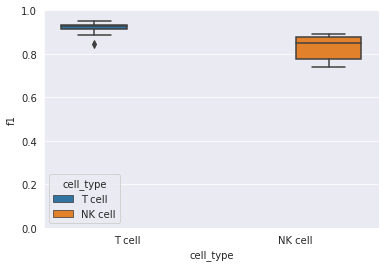

In [14]:
#level_2
sns.set_style("darkgrid")
fig = plt.figure()
ax = sns.boxplot(x = 'cell_type', y='f1', hue = 'cell_type',data = overview_level_2)
ax.set_ylim([0, 1])
fig.savefig('figures/boxplot_level_2.pdf')

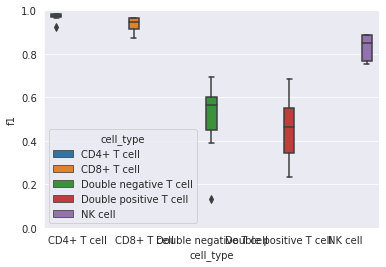

In [15]:
#level_3
sns.set_style("darkgrid")
fig = plt.figure()
ax = sns.boxplot(x = 'cell_type', y='f1', hue = 'cell_type',data = overview_level_3)
ax.set_ylim([0, 1])
fig.savefig('figures/boxplot_level_3.pdf')

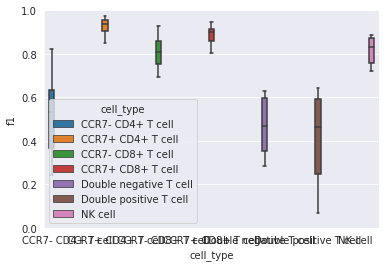

In [16]:
#level_4
sns.set_style("darkgrid")
fig = plt.figure()
ax = sns.boxplot(x = 'cell_type', y='f1', hue = 'cell_type',data = overview_level_4)
ax.set_ylim([0, 1])
fig.savefig('figures/boxplot_level_4.pdf')

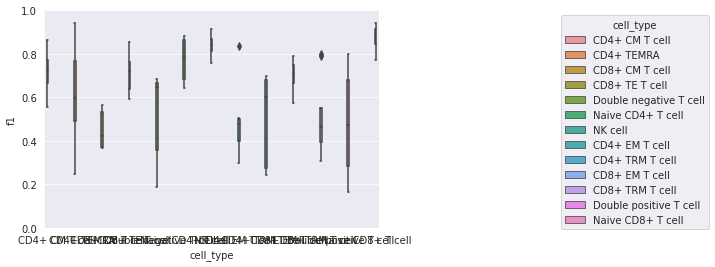

In [24]:
#level_5
sns.set_style("darkgrid")
fig = plt.figure()
ax = sns.boxplot(x = 'cell_type', y='f1', hue = 'cell_type',data = overview_level_5)
ax.set_ylim([0, 1])
sns.move_legend(ax, "upper right",bbox_to_anchor=(, 1))
fig.savefig('figures/boxplot_level_5.pdf')

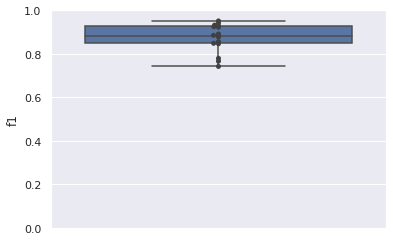

In [135]:
#level_2
sns.set_style("darkgrid")
fig = plt.figure()
ax = sns.boxplot(y = overview_level_2['f1'])
ax = sns.swarmplot(y = overview_level_2['f1'],hue = overview_level_2['cell_type'], color=".25")
ax.set_ylim([0, 1])
fig.savefig('figures/boxplot_level_2.pdf')

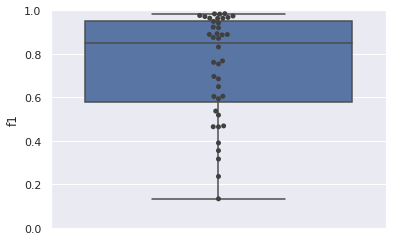

In [131]:
#level_3
sns.set_style("darkgrid")
fig = plt.figure()
ax = sns.boxplot(y = overview_level_3['f1'])
ax = sns.swarmplot(y = overview_level_3['f1'],color=".25")
ax.set_ylim([0, 1])
fig.savefig('figures/boxplot_level_3.pdf')

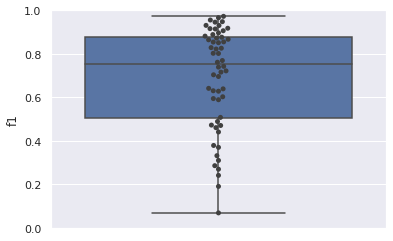

In [132]:
#level_4
sns.set_style("darkgrid")
fig = plt.figure()
ax = sns.boxplot(y = overview_level_4['f1'])
ax = sns.swarmplot(y = overview_level_4['f1'],color=".25")
ax.set_ylim([0, 1])
fig.savefig('figures/boxplot_level_4.pdf')

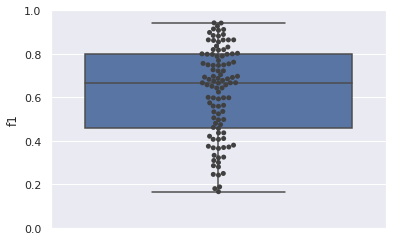

In [133]:
#level_5
sns.set_style("darkgrid")
fig = plt.figure()
ax = sns.boxplot(y = overview_level_5['f1'])
ax = sns.swarmplot(y = overview_level_5['f1'],color=".25")
ax.set_ylim([0, 1])
fig.savefig('figures/boxplot_level_5.pdf')

In [ ]:
#A,B,C,H,J,O,T,U together
sns.set_style("darkgrid")
fig = plt.figure()
ax = sns.boxplot(y = overview['f1'])
ax = sns.swarmplot(y = overview['f1'],color=".25")
fig.savefig('figures/boxplot_all.pdf')

In [112]:
overview['ID']

,ID,level,cell_type,f1
0,A,2,cluster_T cell,0.932255
0,A,2,cluster_NK cell,0.877574
0,A,3,cluster_CD4+ T cell,0.967403
0,A,3,cluster_CD8+ T cell,0.963991
0,A,3,cluster_Double negative T cell,0.390244
...,...,...,...,...
0,U,5,cluster_CD4+ TRM T cell,0.535088
0,U,5,cluster_CD8+ EM T cell,0.788411
0,U,5,cluster_CD8+ TRM T cell,0.325
0,U,5,cluster_Double positive T cell,0.674419


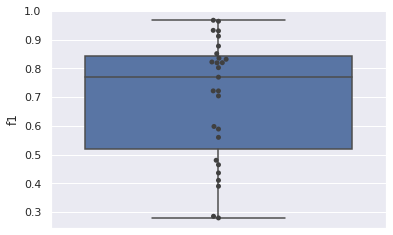

In [111]:
#A
sns.set_style("darkgrid")
fig = plt.figure()
ax = sns.boxplot(y = overview_A['f1'])
ax = sns.swarmplot(y = overview_A['f1'],color=".25")
fig.savefig('figures/boxplot_A.pdf')

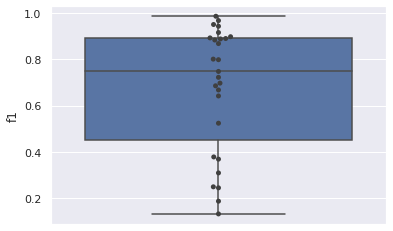

In [114]:
#B
sns.set_style("darkgrid")
fig = plt.figure()
ax = sns.boxplot(y = overview_B['f1'])
ax = sns.swarmplot(y = overview_B['f1'],color=".25")
fig.savefig('figures/boxplot_B.pdf')

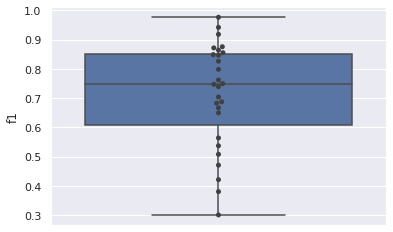

In [115]:
#C
sns.set_style("darkgrid")
fig = plt.figure()
ax = sns.boxplot(y = overview_C['f1'])
ax = sns.swarmplot(y = overview_C['f1'],color=".25")
fig.savefig('figures/boxplot_C.pdf')

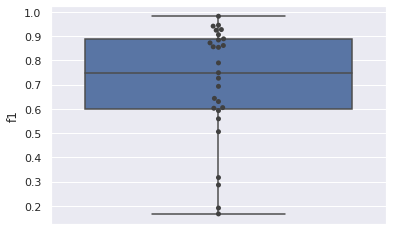

In [116]:
#H
sns.set_style("darkgrid")
fig = plt.figure()
ax = sns.boxplot(y = overview_H['f1'])
ax = sns.swarmplot(y = overview_H['f1'],color=".25")
fig.savefig('figures/boxplot_H.pdf')

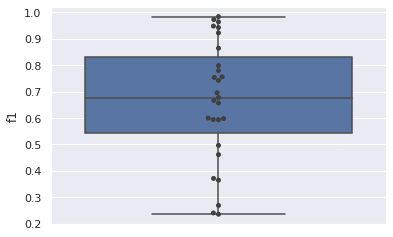

In [117]:
#J
sns.set_style("darkgrid")
fig = plt.figure()
ax = sns.boxplot(y = overview_J['f1'])
ax = sns.swarmplot(y = overview_J['f1'],color=".25")
fig.savefig('figures/boxplot_J.pdf')

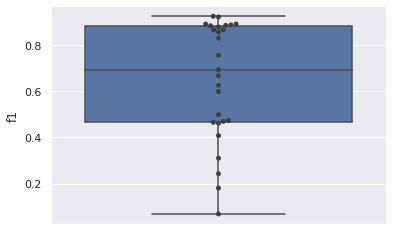

In [118]:
#O
sns.set_style("darkgrid")
fig = plt.figure()
ax = sns.boxplot(y = overview_O['f1'])
ax = sns.swarmplot(y = overview_O['f1'],color=".25")
fig.savefig('figures/boxplot_O.pdf')

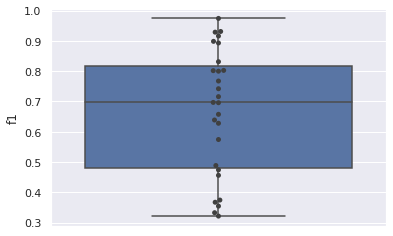

In [119]:
#T
sns.set_style("darkgrid")
fig = plt.figure()
ax = sns.boxplot(y = overview_T['f1'])
ax = sns.swarmplot(y = overview_T['f1'],color=".25")
fig.savefig('figures/boxplot_T.pdf')

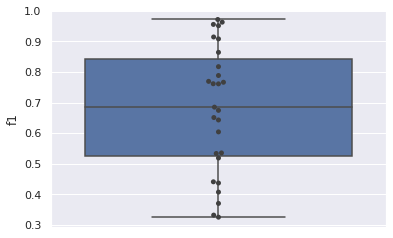

In [120]:
#U
sns.set_style("darkgrid")
fig = plt.figure()
ax = sns.boxplot(y = overview_U['f1'])
ax = sns.swarmplot(y = overview_U['f1'],color=".25")
fig.savefig('figures/boxplot_U.pdf')